In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from comparers import ModelComparer, plot_decision_boundary
from diro2c_wrapper import generate_diro2c_explanation, plot_diro2c_2d, plot_diro2c_tree, \
                           print_diro2c_rules
from baseline import print_rules
from tasks.cluster_example import make_task
from sklearn.model_selection import train_test_split

In [2]:
clf_a, clf_b, X, y, feature_names = make_task()

In [3]:
comparer = ModelComparer(clf_a, clf_b, feature_names)

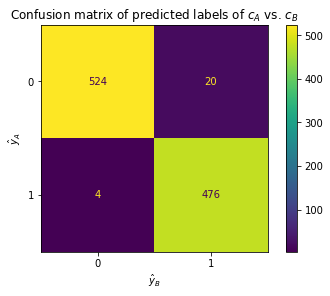

In [4]:
comparer.plot_confusion_matrix(X)

# Global explanations

In [29]:
mclass_diff = comparer.predict_mclass_diff(X)

## $(0,1)$

In [5]:
focus_class = '(0, 1)'

In [17]:
%%time
#X_sample, _ = train_test_split(X, train_size=0.1, random_state=0)
explanation = generate_diro2c_explanation(X, 0, comparer, generation_func='global',
                                          focus_class=focus_class, gn_population_size=200)
with open(f'diro2c.{focus_class}.pickle', 'wb') as f:
    pickle.dump(explanation, f, pickle.HIGHEST_PROTOCOL)

CPU times: user 55.8 s, sys: 331 ms, total: 56.1 s
Wall time: 57.3 s


In [18]:
with open(f'diro2c.{focus_class}.pickle', 'rb') as f:
    explanation = pickle.load(f)

In [19]:
evaluation_info = explanation['binary_diff_classifer']['evaluation_info']
X_explain, y_explain = evaluation_info['X'], evaluation_info['y']

In [20]:
tree = DecisionTreeClassifier()
tree.fit(X_explain, y_explain)
feature_names = comparer.feature_names
class_names = explanation['class_names']

In [21]:
feature_importances = tree.feature_importances_
feature_order = np.flip(np.argsort(feature_importances))

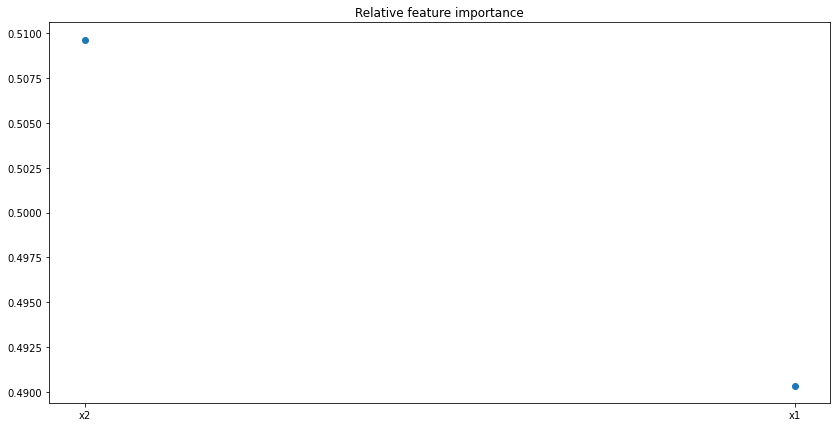

In [22]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.set_title('Relative feature importance')
ax.scatter(comparer.feature_names[feature_order], feature_importances[feature_order])
plt.show()

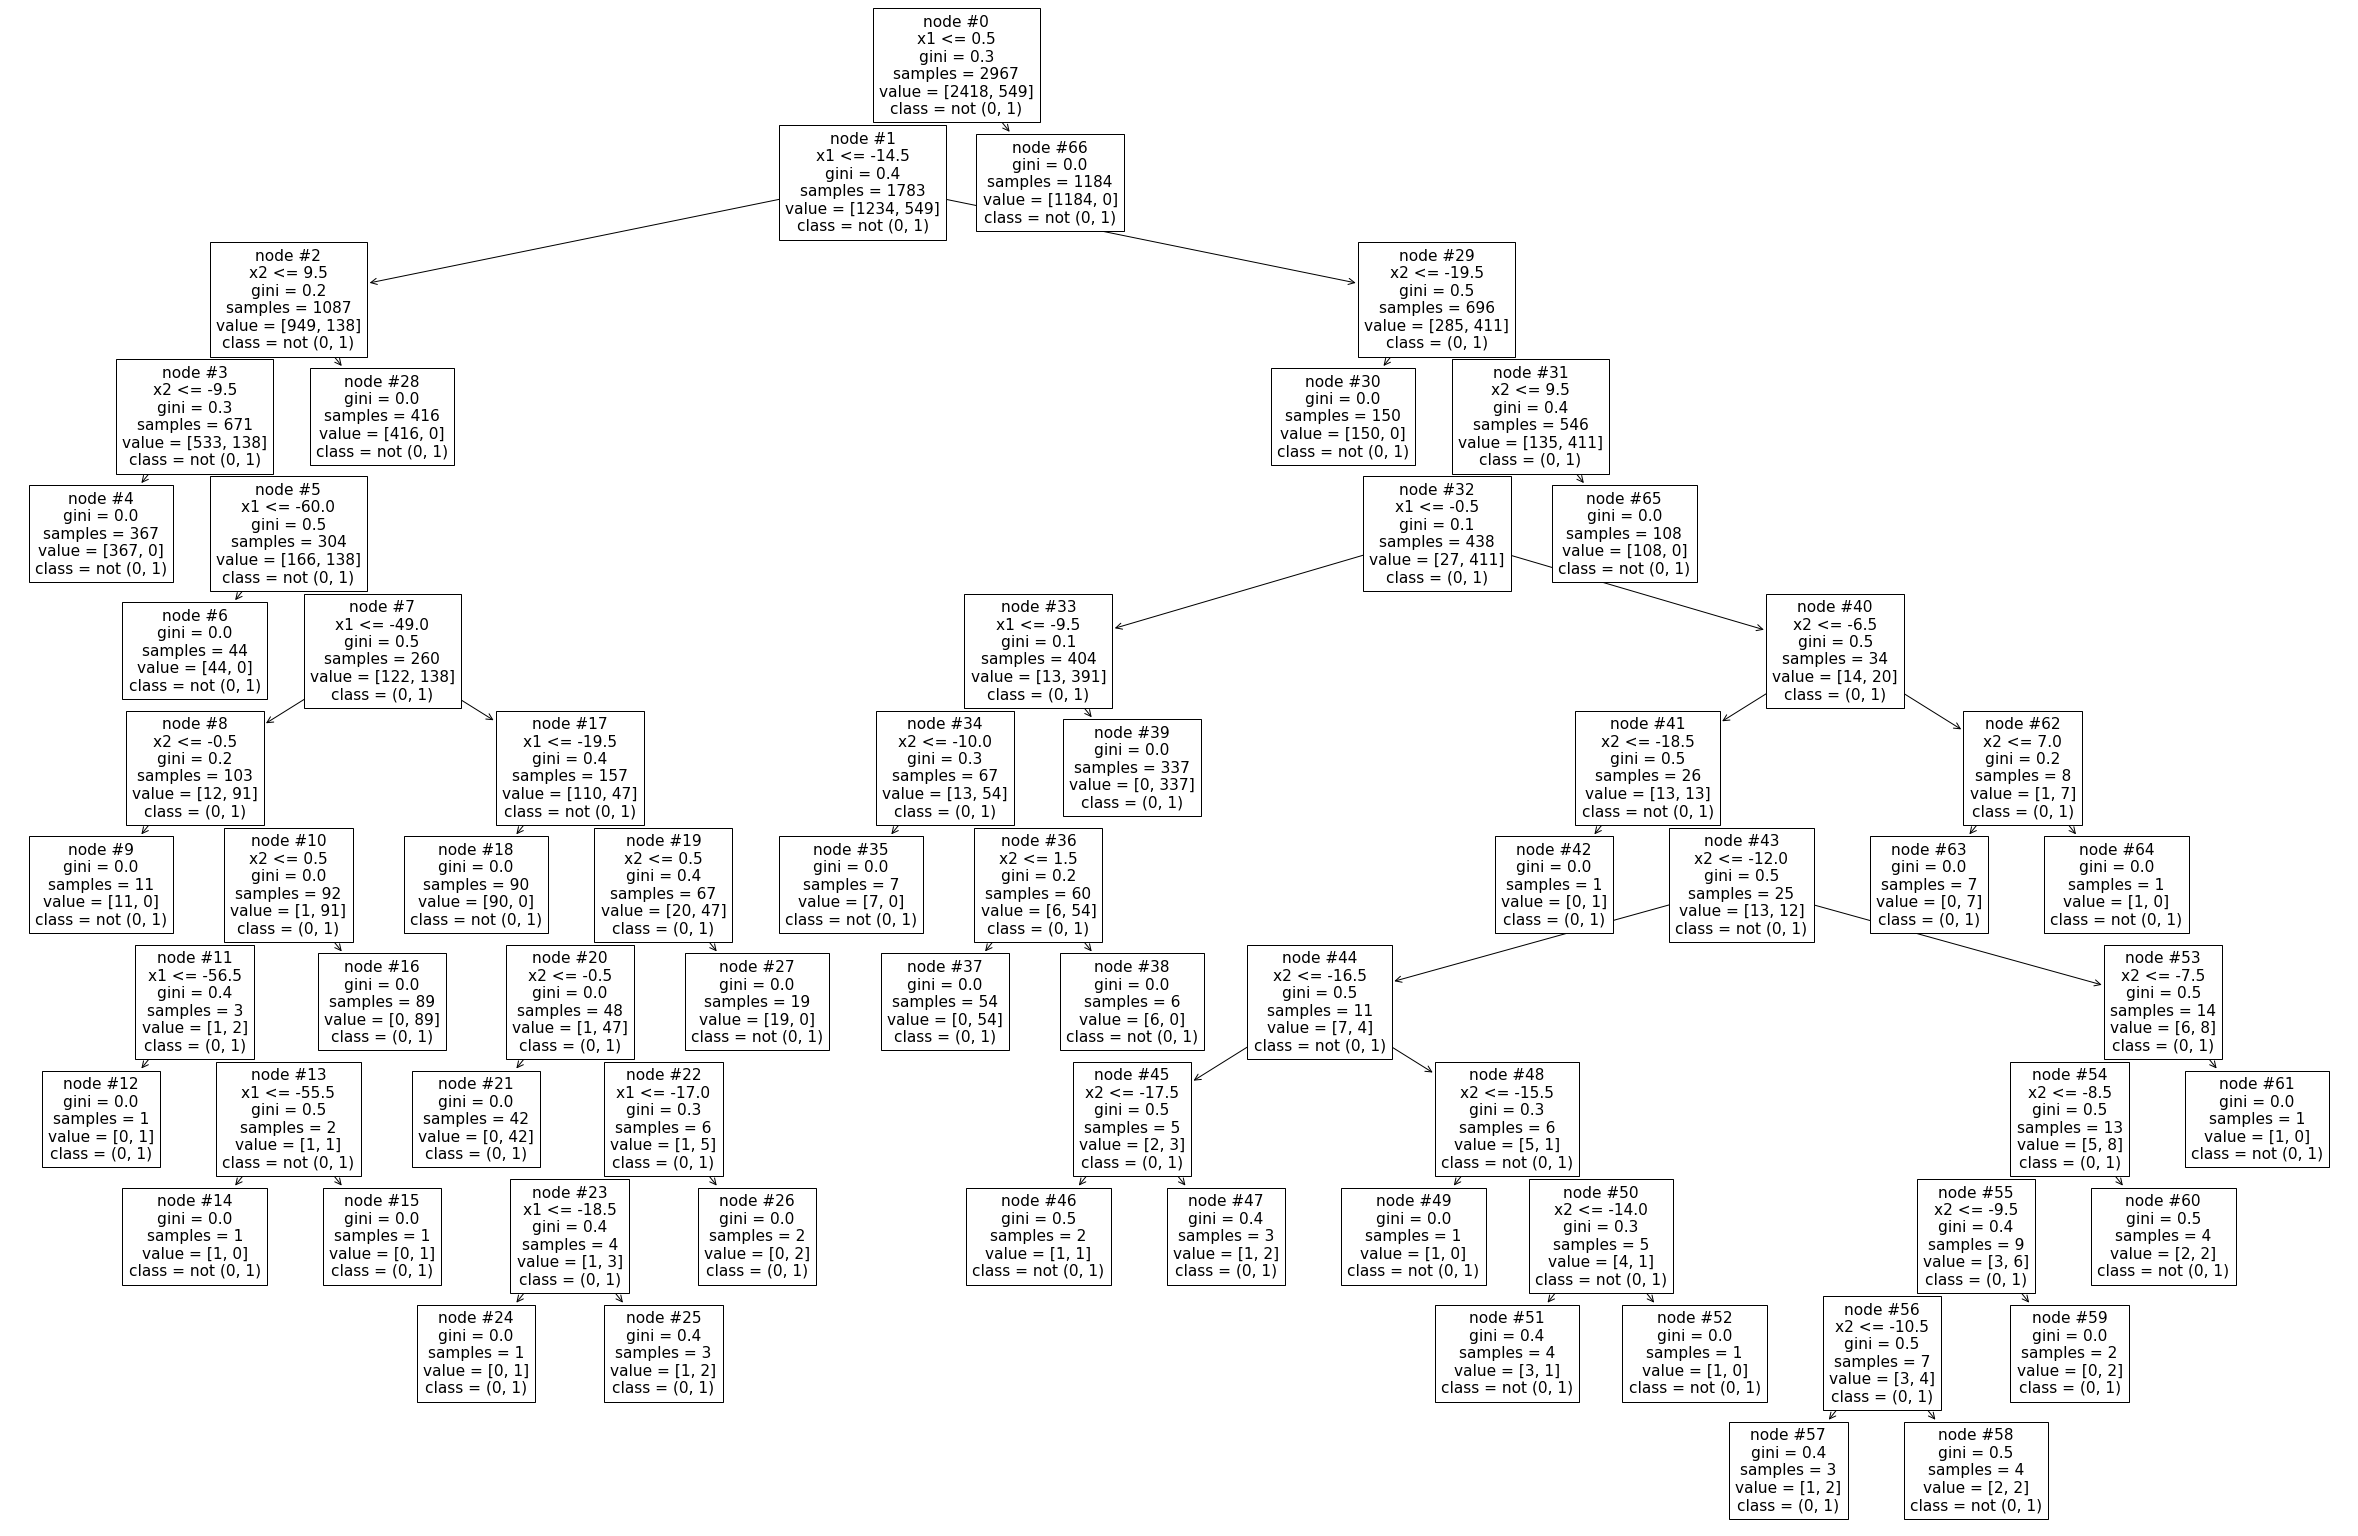

In [23]:
fig, ax = plt.subplots(figsize=(42, 28))
plot_tree(tree, feature_names=feature_names, class_names=class_names, ax=ax, precision=1, node_ids=True);

In [24]:
print_rules(tree, feature_names, class_names, focus_class, feature_order)

node #39: if (x2 > -19.5) and (x2 <= 9.5) and (x1 > -9.5) and (x1 <= -0.5) then class: (0, 1) (337/337 instances)
node #16: if (x2 > 0.5) and (x2 <= 9.5) and (x1 > -60.0) and (x1 <= -49.0) then class: (0, 1) (89/89 instances)
node #37: if (x2 > -10.0) and (x2 <= 1.5) and (x1 > -14.5) and (x1 <= -9.5) then class: (0, 1) (54/54 instances)
node #21: if (x2 > -9.5) and (x2 <= -0.5) and (x1 > -19.5) and (x1 <= -14.5) then class: (0, 1) (42/42 instances)
node #63: if (x2 > -6.5) and (x2 <= 7.0) and (x1 > -0.5) and (x1 <= 0.5) then class: (0, 1) (7/7 instances)
node #47: if (x2 > -17.5) and (x2 <= -16.5) and (x1 > -0.5) and (x1 <= 0.5) then class: (0, 1) (2/3 instances)
node #25: if (x2 > -0.5) and (x2 <= 0.5) and (x1 > -18.5) and (x1 <= -17.0) then class: (0, 1) (2/3 instances)
node #57: if (x2 > -12.0) and (x2 <= -10.5) and (x1 > -0.5) and (x1 <= 0.5) then class: (0, 1) (2/3 instances)
node #59: if (x2 > -9.5) and (x2 <= -8.5) and (x1 > -0.5) and (x1 <= 0.5) then class: (0, 1) (2/2 instance

In [25]:
pd.Series(class_names[y_explain]).value_counts()

not (0, 1)    2418
(0, 1)         549
dtype: int64

In [35]:
(337+16+37+21+63)/549

0.8633879781420765

In [30]:
indices = np.where(comparer.class_names[mclass_diff] == focus_class)[0]
pred_nodes = tree.apply(X[indices])
pd.Series(pred_nodes).value_counts()

39    5
63    3
65    2
37    2
16    2
28    2
51    1
21    1
26    1
58    1
dtype: int64

In [34]:
(5+2+2+1)/20

0.5

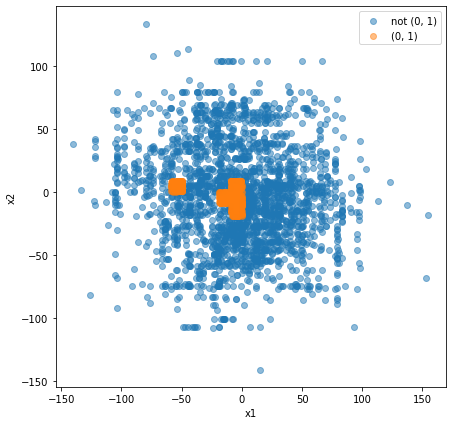

In [36]:
plot_diro2c_2d(explanation, 'x1', 'x2')

## $(1,0)$

In [37]:
focus_class = '(1, 0)'

In [39]:
%%time
#X_sample, _ = train_test_split(X, train_size=0.1, random_state=0)
explanation = generate_diro2c_explanation(X, 0, comparer, generation_func='global',
                                          focus_class=focus_class, gn_population_size=200)
with open(f'diro2c.{focus_class}.pickle', 'wb') as f:
    pickle.dump(explanation, f, pickle.HIGHEST_PROTOCOL)

CPU times: user 59.4 s, sys: 637 ms, total: 1min
Wall time: 1min 3s


In [40]:
with open(f'diro2c.{focus_class}.pickle', 'rb') as f:
    explanation = pickle.load(f)

In [41]:
evaluation_info = explanation['binary_diff_classifer']['evaluation_info']
X_explain, y_explain = evaluation_info['X'], evaluation_info['y']

In [42]:
tree = DecisionTreeClassifier()
tree.fit(X_explain, y_explain)
feature_names = comparer.feature_names
class_names = explanation['class_names']

In [43]:
feature_importances = tree.feature_importances_
feature_order = np.flip(np.argsort(feature_importances))

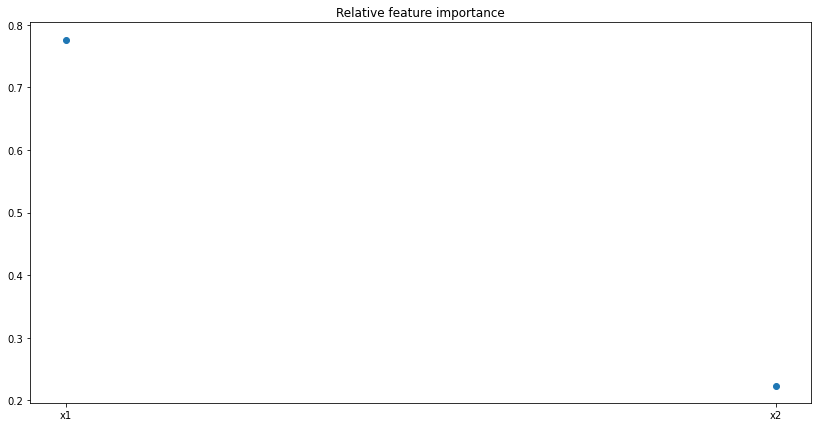

In [44]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.set_title('Relative feature importance')
ax.scatter(comparer.feature_names[feature_order], feature_importances[feature_order])
plt.show()

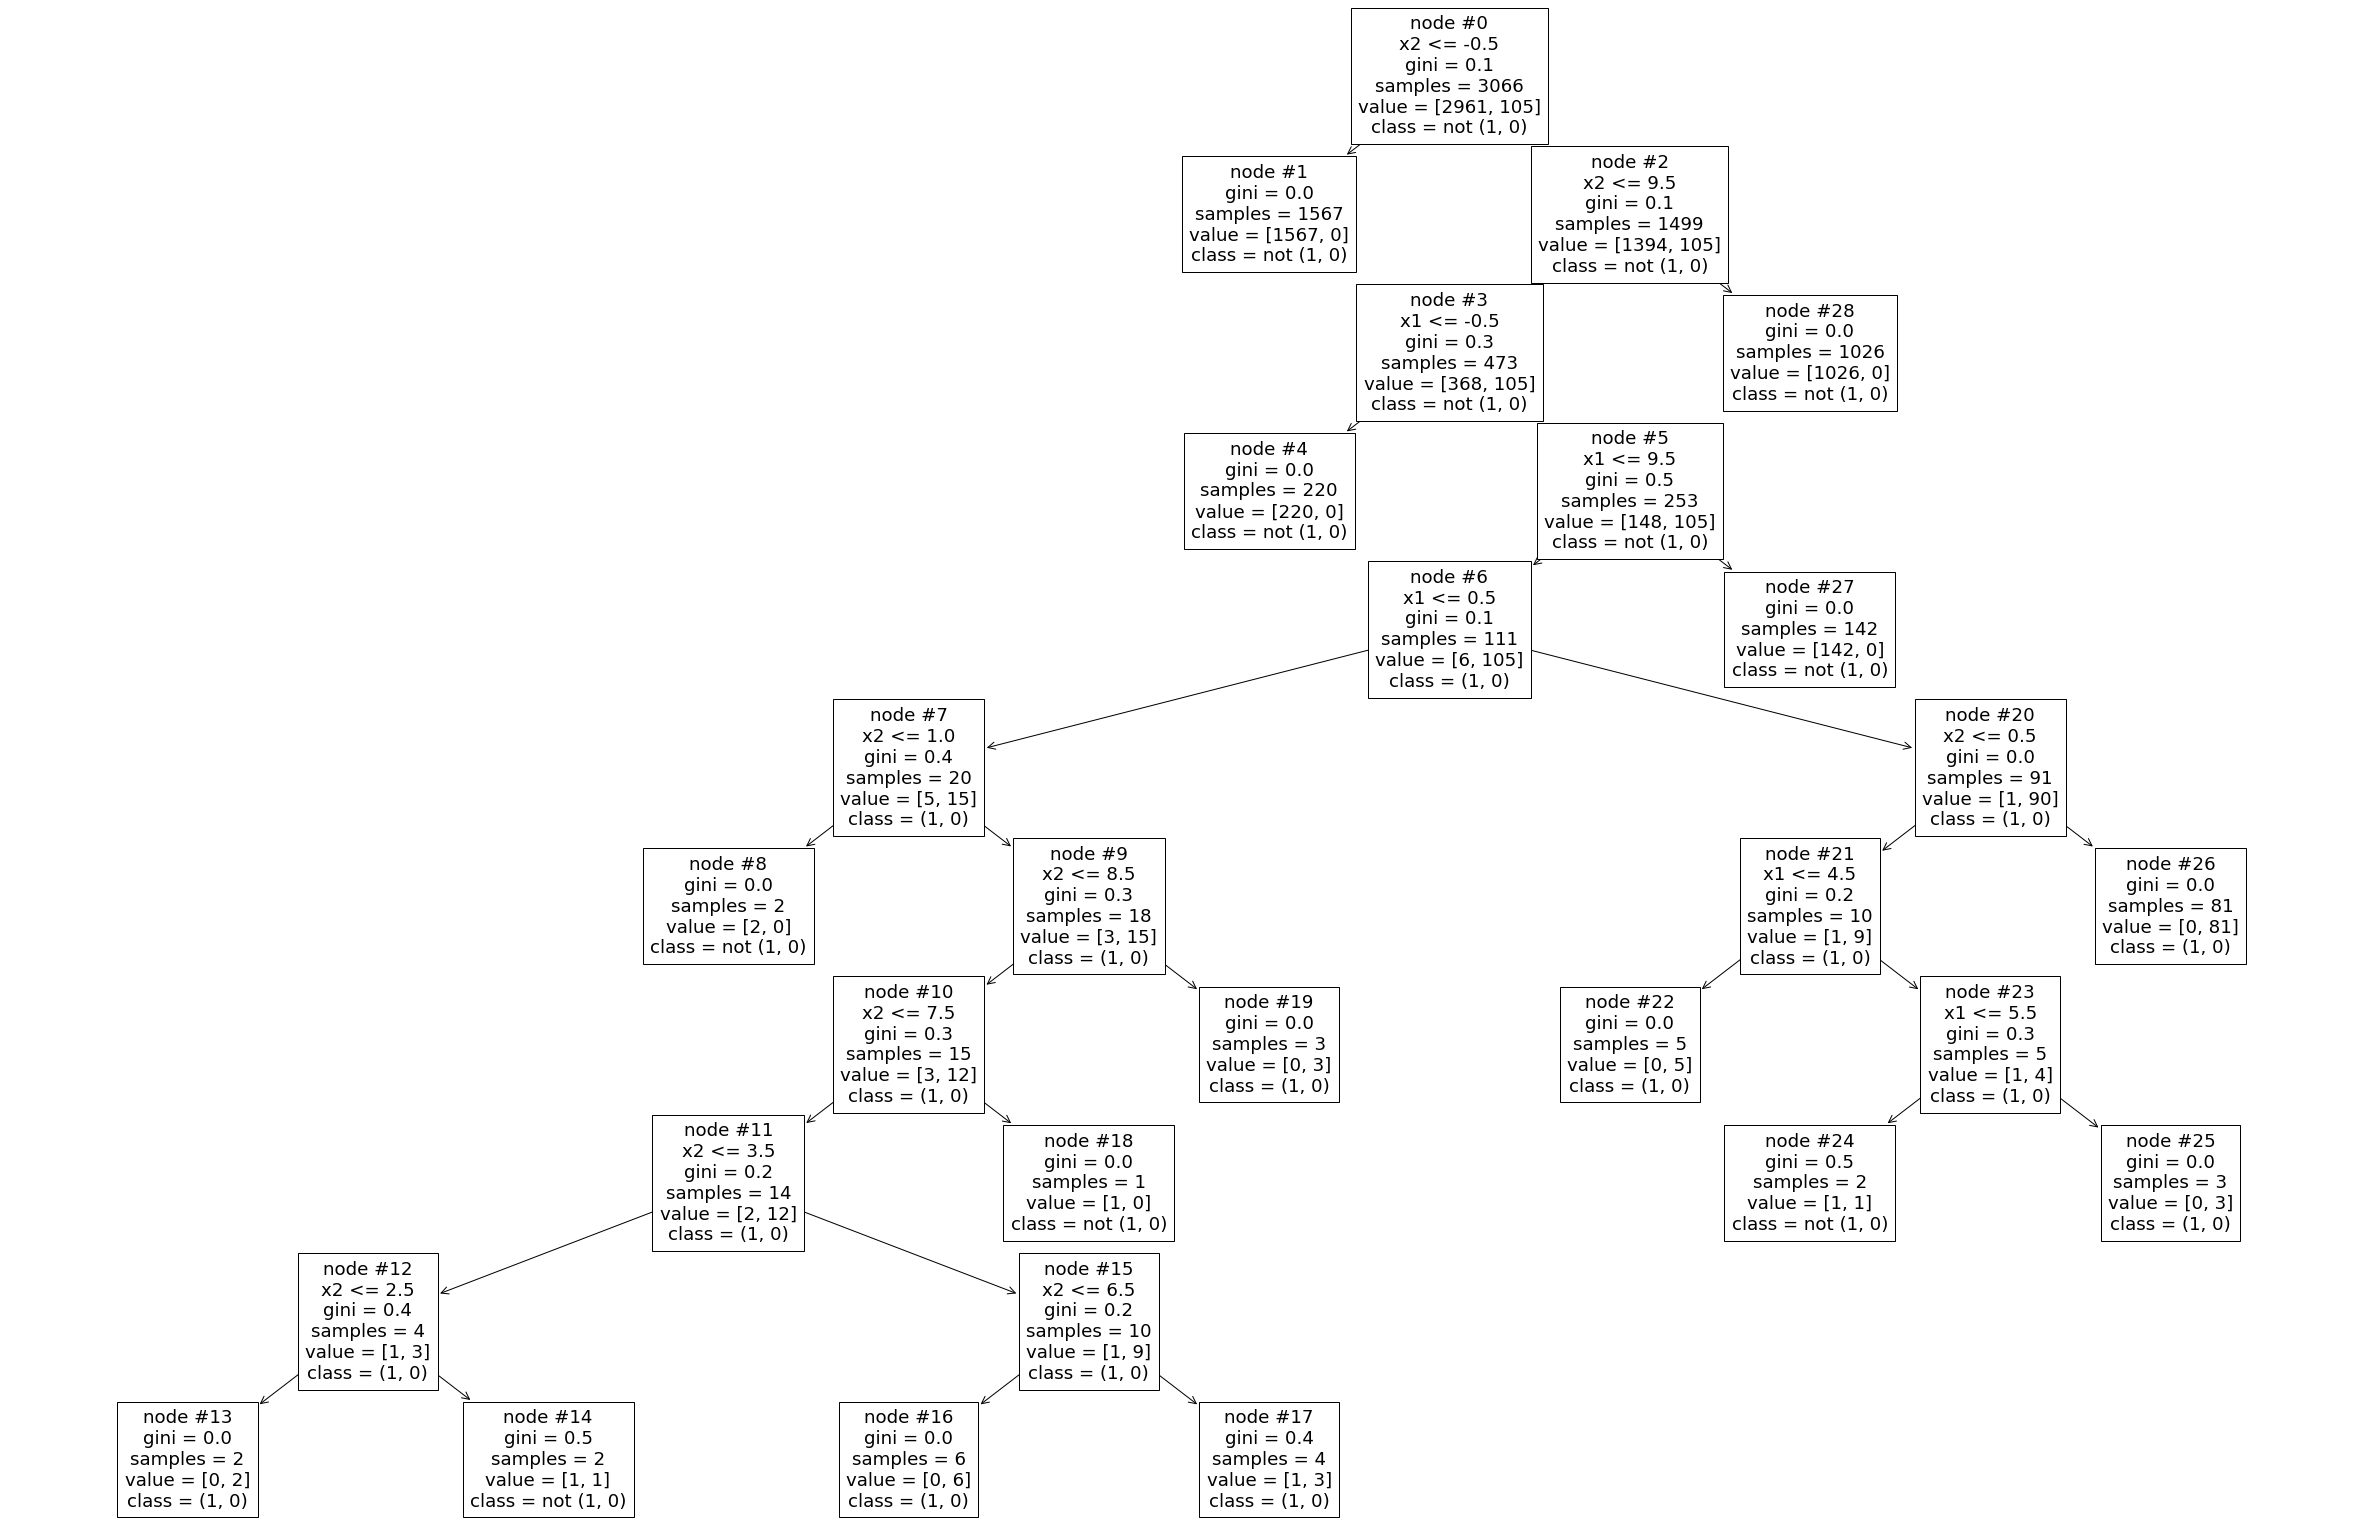

In [45]:
fig, ax = plt.subplots(figsize=(42, 28))
plot_tree(tree, feature_names=feature_names, class_names=class_names, ax=ax, precision=1, node_ids=True);

In [46]:
print_rules(tree, feature_names, class_names, focus_class, feature_order)

node #26: if (x1 > 0.5) and (x1 <= 9.5) and (x2 > 0.5) and (x2 <= 9.5) then class: (1, 0) (81/81 instances)
node #16: if (x1 > -0.5) and (x1 <= 0.5) and (x2 > 3.5) and (x2 <= 6.5) then class: (1, 0) (6/6 instances)
node #22: if (x1 > 0.5) and (x1 <= 4.5) and (x2 > -0.5) and (x2 <= 0.5) then class: (1, 0) (5/5 instances)
node #17: if (x1 > -0.5) and (x1 <= 0.5) and (x2 > 6.5) and (x2 <= 7.5) then class: (1, 0) (3/4 instances)
node #25: if (x1 > 5.5) and (x1 <= 9.5) and (x2 > -0.5) and (x2 <= 0.5) then class: (1, 0) (3/3 instances)
node #19: if (x1 > -0.5) and (x1 <= 0.5) and (x2 > 8.5) and (x2 <= 9.5) then class: (1, 0) (3/3 instances)
node #13: if (x1 > -0.5) and (x1 <= 0.5) and (x2 > 1.0) and (x2 <= 2.5) then class: (1, 0) (2/2 instances)


In [47]:
pd.Series(class_names[y_explain]).value_counts()

not (1, 0)    2961
(1, 0)         105
dtype: int64

In [52]:
(81)/105

0.7714285714285715

In [49]:
indices = np.where(comparer.class_names[mclass_diff] == focus_class)[0]
pred_nodes = tree.apply(X[indices])
pd.Series(pred_nodes).value_counts()

28    2
26    1
27    1
dtype: int64

In [53]:
(1)/4

0.25

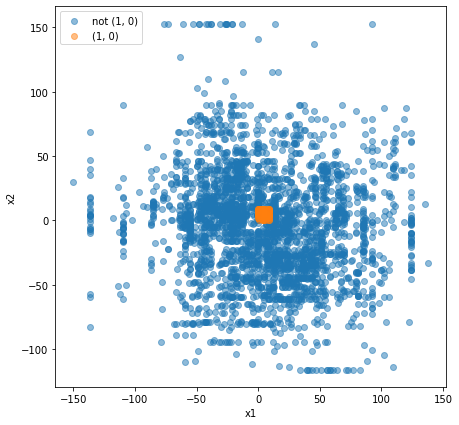

In [54]:
plot_diro2c_2d(explanation, 'x1', 'x2')